In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import astropy.units as u
from astropy.time import Time

from baseband import vdif
from scintellometry.io import AROCHIMERawData
%matplotlib inline

In [60]:
dir = 'mountpoint/ARO_2015/20150724T170055Z_aro_raw/20150724T170055Z_aro_raw/'
sample_rate = 800.*u.MHz
fedge = 800.*u.MHz
tgp = Time('2015-07-24T18:42:01.711') - 0.26*u.s

filelist = ['%s0000072.dat' % (dir), '%s0000073.dat' % (dir)]

fh = AROCHIMERawData(filelist, blocksize=2**25, samplerate=sample_rate, fedge=fedge, fedge_at_top=True)
T = fh.time()

seek = (tgp.unix - T.unix) * 8 * 10**8
spectrum_bytes = 2**11

data = fh.seek_record_read(int(seek//spectrum_bytes) * spectrum_bytes, 2**30)
data = data.view(data.dtype.fields.values()[0][0])
data = data.reshape(-1, 1024, 2)


In AROCHIMERawData, calling super
('Start time: ', '2015-07-24 18:41:44.284')


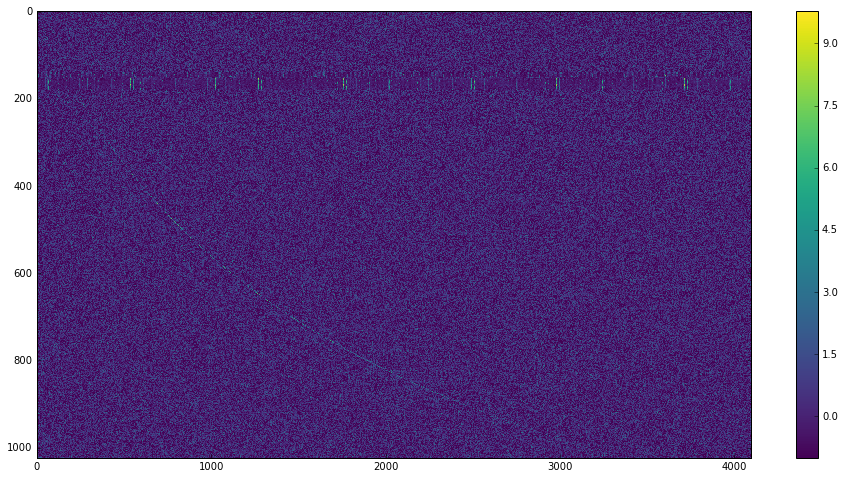

In [62]:
power = (np.abs(data)**2.0).sum(-1)
power_bin = power.reshape(-1, 128, 1024).sum(1)
pbgsub = (power_bin - power_bin.mean(axis=0)) / power_bin.std(axis=0)


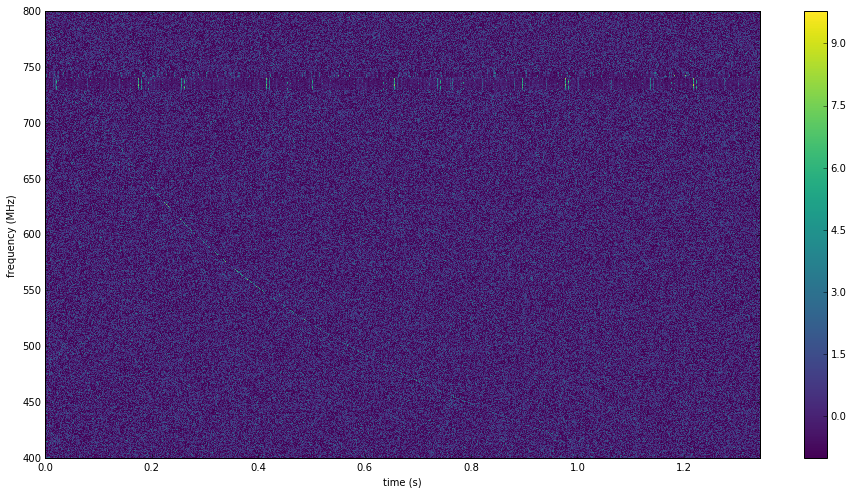

In [70]:
xl = 4096*128*2.56*10**(-6)
plt.figure(figsize=(16,8))
plt.imshow(pbgsub.T, aspect='auto', interpolation='nearest', cmap=cm.viridis,
          extent=[0,xl, 400, 800], vmin=-1)
plt.xlabel('time (s)')
plt.ylabel('frequency (MHz)')
plt.colorbar()